<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nienadzorowane/1_Klasteryzacja/3_K_srednich_metoda_lokcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-srednich - metoda łokcia
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Algorytm K-średnich](#2)
4. [WCSS - Within-Cluster Sum-of-Squared](#3)
5. [Metoda "łokcia" - Elbow Method](#4)
6. [Wizualizacja klastrów](#5)


### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(font_scale=1.3)

### <a name='1'></a> Wygenerowanie danych

In [3]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8, 8), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=950, height=500, title='Algorytm K-średnich', template='plotly_dark')

### <a name='2'></a> Algorytm K-średnich

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
#WCSS
kmeans.inertia_

3852.6174341943306

In [7]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,4
1,-4.390559,-5.055149,0
2,-4.666211,-5.390080,0
3,3.022862,0.303769,2
4,3.322516,-0.676179,2


In [8]:
px.scatter(df, 'x1', 'x2', color='y_kmeans', width=950, height=500, title='Algorytm K-średnich - 5 klastrów', 
           template='plotly_dark')

### <a name='3'></a> WCSS - Within-Cluster Sum-of-Squared

In [9]:
wcss = []
for i in range (2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

print(wcss)

[23414.040458695992, 7734.886635126097, 4282.137026938608, 3858.15140177948, 3444.139414334606, 3050.505003641343, 2725.047778756752, 2471.3375210002932]


In [16]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss.reset_index(inplace=True)
wcss.rename(columns={'index': 'clusters'}, inplace=True)
wcss['clusters'] += 1
wcss

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3858.151402
4,5,3444.139414
5,6,3050.505004
6,7,2725.047779
7,8,2471.337521


### <a name='4'></a> Metoda "łokcia" - Elbow Method

In [21]:
px.line(wcss, 'clusters', 'wcss', width=950, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)', 
           template='plotly_dark')

### <a name='5'></a> Wizualizacja klastrów

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', color='y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry', 
           template='plotly_dark')

In [26]:
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1', 'c2'])
centers

,c1,c2
0,-4.678306,6.633539
1,-5.302413,-5.404200
2,3.630348,1.808377


In [29]:
fig = px.scatter(df, 'x1', 'x2', color='y_kmeans', width=950, height=500, title='Algorytm K-średnich - 3 klastry', 
           template='plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers',
              marker={'size': 12, 'color': 'LightSkyBlue', 'line': {'width': 2, 'color': 'tomato'}},
              showlegend=False))
fig.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



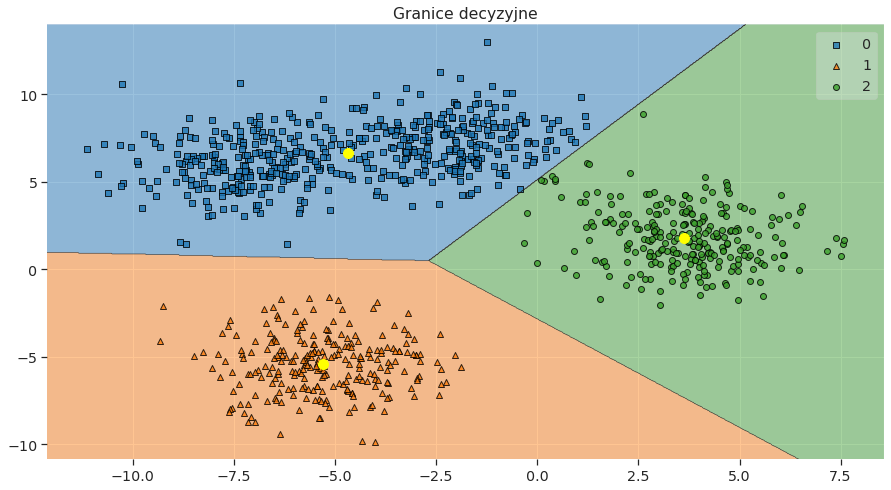

In [34]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15, 8))
plt.title('Granice decyzyjne')
plot_decision_regions(X=data, y=y_kmeans, clf=kmeans, legend=True)
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=100, c='yellow')
plt.show()